# Lasso Regression

In [27]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [15]:
# Importing Dataset

df = pd.read_csv('student_exam_scores.csv')

In [16]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


# Preprocessing data 

In [17]:
df = df.drop('student_id',axis = 1)

In [18]:
# Splitting the data

x = df.drop('exam_score',axis = 1)
y = df['exam_score']

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                random_state = 20)

In [19]:
minmax_scaling = ('minmax',MinMaxScaler(),['hours_studied','sleep_hours','attendance_percent','previous_scores'])

In [20]:
trf = ColumnTransformer(transformers = [
    minmax_scaling
],remainder = 'passthrough')

# Model - Lasso

In [22]:
from sklearn.linear_model import Lasso

In [39]:
lasso = Lasso(alpha = 0.01)

In [40]:
pipe = make_pipeline(trf,lasso)

In [41]:
pipe.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('minmax', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
y_pred = pipe.predict(x_test)

In [43]:
print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.8521987075678221


# Lasso - with one independent and one dependent variable

In [93]:
package = pd.read_csv('cgpa_vs_package.csv')

In [96]:
x1 = package['cgpa'].values.reshape(-1,1)
y1 = package['package'].values

x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,
                                                     test_size = 0.2,
                                                    random_state = 30)

Text(0, 0.5, 'Y')

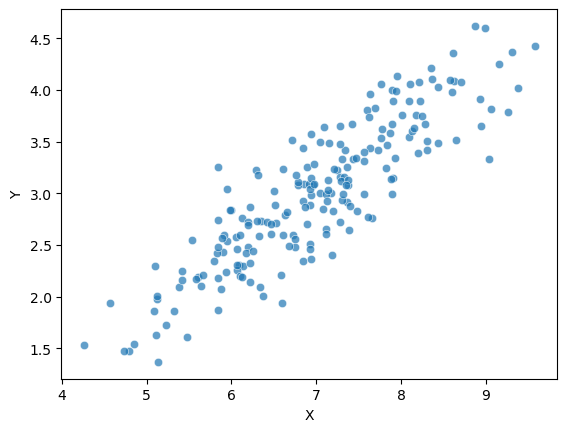

In [112]:
sns.scatterplot(x = x1.flatten(),y = y1,alpha = 0.7)
plt.xlabel("X")
plt.ylabel("Y")

In [105]:
lasso1 = Lasso(alpha = 0.01)

In [106]:
lasso1.fit(x_train1,y_train1)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [108]:
y_pred1 = lasso1.predict(x_test1)

In [109]:
print("R2 Score : ",r2_score(y_test1,y_pred1))

R2 Score :  0.7214435005358223


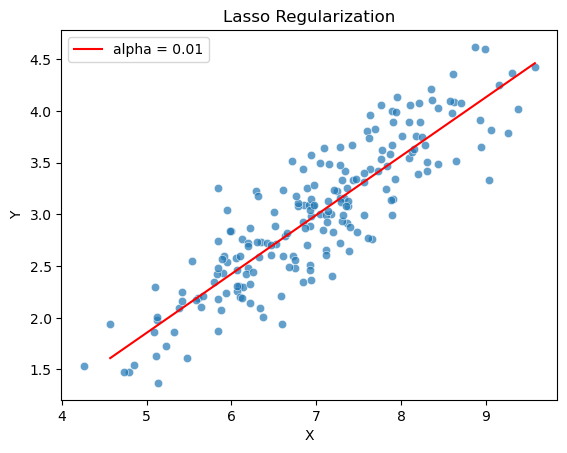

In [120]:
sns.scatterplot(x = x1.flatten(), y = y1,alpha = 0.7)
plt.plot(sorted(x_test1),sorted(y_pred1), color = 'red',label = 'alpha = 0.01')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lasso Regularization")
plt.legend()

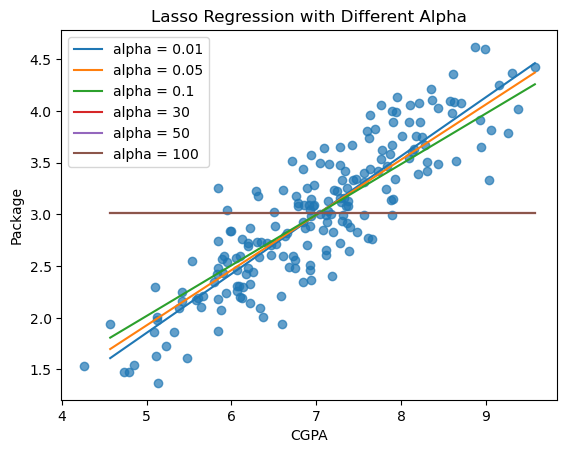

In [121]:
# scatter plot
plt.scatter(x=x1.flatten(), y=y1, alpha=0.7)

alphas = [0.01, 0.05, 0.1, 30, 50, 100]

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_train1, y_train1)
    lasso_pred = lasso_reg.predict(x_test1)
    
    # sort x_test1 and predictions for a smooth line
    sort_idx = np.argsort(x_test1.flatten())
    plt.plot(
        x_test1.flatten()[sort_idx],
        lasso_pred[sort_idx],
        label=f'alpha = {alpha}'
    )

plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Lasso Regression with Different Alpha")
plt.legend()
plt.show()
